<a href="https://colab.research.google.com/github/jhon18more/Final-Python2/blob/main/Jon_more_ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf


In [29]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""


In [21]:
df_iris = datasets.load_iris()

x = df_iris.data
y = df_iris.target

#Analizmos la dimencionalidad de la data
print(np.shape(x))
print(np.shape(y))
y = np.reshape(y,(150,1))
print(np.shape(y))

#Dividimos la data
Xtrain,Xtest,ytrain,ytest = tts(x,y,test_size = 0.2, random_state=42)

(150, 4)
(150,)
(150, 1)


In [36]:
#Modelo SVC
svcmodel = SVC(gamma = 'scale', random_state = 42) # Kernel radial, kernel polinomico
svcmodel.fit(Xtrain,ytrain)

ypredicttest = svcmodel.predict(Xtest)
ypredicttrain = svcmodel.predict(Xtrain)

matriz_confu_train = multilabel_confusion_matrix(ytrain,ypredicttrain)
matriz_confu_test = multilabel_confusion_matrix(ytest,ypredicttest)
print('_'*90)

print('      MODELO SVC      ')
print('_'*80)
print('Las natrices de confusión para entrenamiento')
print('')
print(matriz_confu_train)

print(classification_report(ytrain, ypredicttrain))
print('-'*65)
print('Las natrices de confusión para validación')
print('')
print(matriz_confu_test) 

print(classification_report(ytest, ypredicttest))

print('_'*80)

__________________________________________________________________________________________
      MODELO SVC      
________________________________________________________________________________
Las natrices de confusión para entrenamiento

[[[80  0]
  [ 0 40]]

 [[78  1]
  [ 2 39]]

 [[79  2]
  [ 1 38]]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

-----------------------------------------------------------------
Las natrices de confusión para validación

[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 0  9]]

 [[19  0]
  [ 0 11]]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#MODELO 2 RANDOM FOREST

randonforest=RFC(n_estimators=200)
randonforest.fit(Xtrain,ytrain)
y_predi_randon_test=randonforest.predict(Xtest)
y_predi_randon_train=randonforest.predict(Xtrain)

print('_'*90)
print('PARA ENTRENAMIENTO')
print('')
print(classification_report(ytrain,y_predi_randon_train))
print('Matriz de confusión')
print(multilabel_confusion_matrix(ytrain,y_predi_randon_train))
print('-'*70)
print('PARA VALIDACIÓN')
print('')
print(classification_report(ytest,y_predi_randon_test))
print('Matriz de confusión')
print(multilabel_confusion_matrix(ytest,y_predi_randon_test))
print('_'*90)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


__________________________________________________________________________________________
PARA ENTRENAMIENTO

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Matriz de confusión
[[[80  0]
  [ 0 40]]

 [[79  0]
  [ 0 41]]

 [[81  0]
  [ 0 39]]]
----------------------------------------------------------------------
PARA VALIDACIÓN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted

PREGUNTA 2

In [71]:
 """
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""

data_df = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
#display(data_df.head(10))

In [72]:
data_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [73]:


x1 = np.array(data_df.drop(columns = ['Car','Suburb','Address','Type','Price','Method','SellerG','Date','Postcode','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount']))
#Se ha requerido trabajar solo con algunos datos
y1 = np.array(data_df['Price'])
#y1 = np.reshape(y1,(len(y1),1))
print(np.shape(y1))

(13580,)


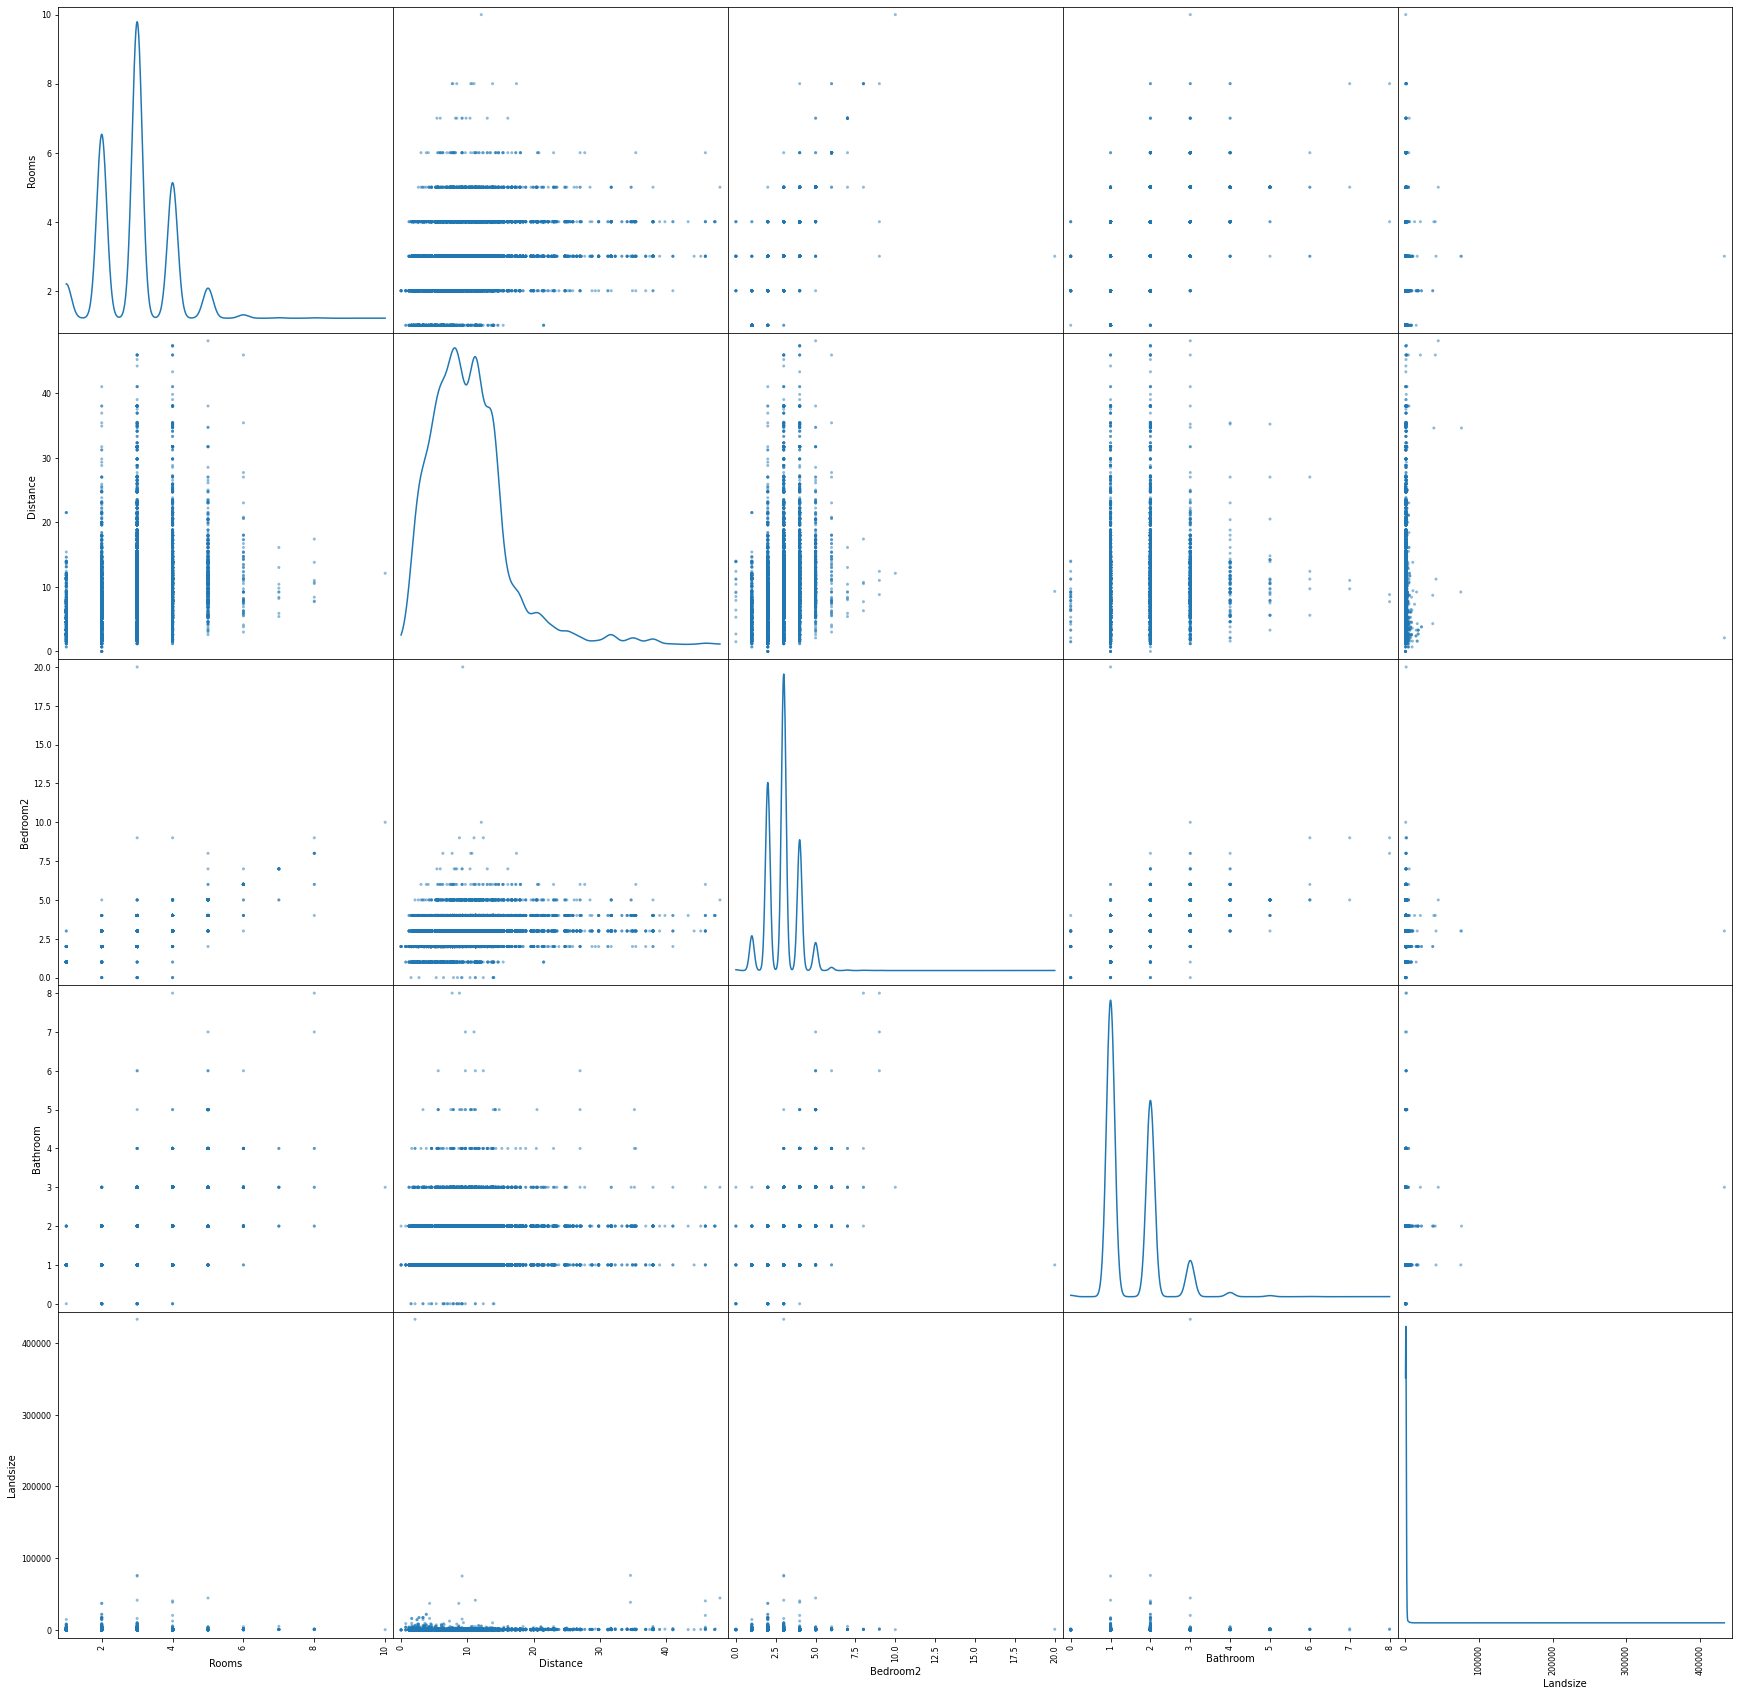

In [74]:


X_df = data_df.drop(columns = ['Car','Suburb','Address','Type','Price','Method','SellerG','Date','Postcode','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'])
pd.plotting.scatter_matrix(X_df,figsize = (30,30),diagonal = 'kde')
plt.show()

In [ ]:
print(X_df[:0])
#print(X_df['Car'].unique())


In [82]:
X1 = x1[:,0]
X1 = np.reshape(X1,(len(X1),1))
print(np.shape(X1))
y1 = np.reshape(y1,(len(y1),1))
print(np.shape(y1))

(13580, 1)
(13580, 1)


In [85]:
#Estandarizar antes de escalar
#Estandarizar
scaler = StandardScaler().fit(x1)
x_standarized = scaler.transform(x1)
scaler0 = StandardScaler().fit(y1)
y_standarized = scaler0.transform(y1)

"""
fig,ax = plt.subplots(1,2)
sns.histplot(X1,ax=ax[0])
ax[0].set_title('Original')
sns.histplot(x_standarized[:,0],ax=ax[1])
ax[1].set_title('Standarized data')
plt.show()
"""


'\nscaler2 = StandardScaler().fit(X_features)\nx_standarized2 = scaler2.fit_transform(X_features)\nscaler3 = StandardScaler().fit(y_target)\ny_standarized2 = scaler3.fit_transform(y_target)\n\nscal = MinMaxScaler()  \nx_scal = scal.fit_transform(x_standarized2)\ny_scal = scal.fit_transform(y_standarized2)\n\nXtrain3,Xtest3,ytrain3,ytest3 = tts(x_scal,y_scal, test_size=0.3)\n'

In [60]:
x1

array([[  2. ,   2.5,   2. ,   1. ,   1. , 202. ],
       [  2. ,   2.5,   2. ,   1. ,   0. , 156. ],
       [  3. ,   2.5,   3. ,   2. ,   0. , 134. ],
       ...,
       [  3. ,   6.8,   3. ,   2. ,   4. , 436. ],
       [  4. ,   6.8,   4. ,   1. ,   5. , 866. ],
       [  4. ,   6.3,   4. ,   1. ,   1. , 362. ]])

In [107]:
X1

array([[2.],
       [2.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [61]:
x_standarized

array([[-0.98146337, -1.30148498, -0.94703517, -0.77237552, -0.63378016,
        -0.08931566],
       [-0.98146337, -1.30148498, -0.94703517, -0.77237552, -1.67263551,
        -0.10084297],
       [ 0.06487613, -1.30148498,  0.08828423,  0.67336667, -1.67263551,
        -0.10635603],
       ...,
       [ 0.06487613, -0.56876052,  0.08828423,  0.67336667,  2.48278592,
        -0.03067672],
       [ 1.11121563, -0.56876052,  1.12360364, -0.77237552,  3.52164128,
         0.0770786 ],
       [ 1.11121563, -0.65396104,  1.12360364, -0.77237552, -0.63378016,
        -0.04922066]])

In [89]:
#Escalar
scal = MinMaxScaler()  
x_scal0 = scal.fit_transform(x_standarized)
y_scal0 = scal.fit_transform(y_standarized)

"""fig,ax = plt.subplots(1,2)
sns.histplot(X1,ax=ax[0])
ax[0].set_title('Original')
sns.histplot(x_escalado,ax=ax[1])
ax[1].set_title('Scaled data')
plt.show()"""

"fig,ax = plt.subplots(1,2)\nsns.histplot(X1,ax=ax[0])\nax[0].set_title('Original')\nsns.histplot(x_escalado,ax=ax[1])\nax[1].set_title('Scaled data')\nplt.show()"

In [14]:
#X_df.value_counts()
#xt = x_escalado

(13580, 2)
(13580, 1)


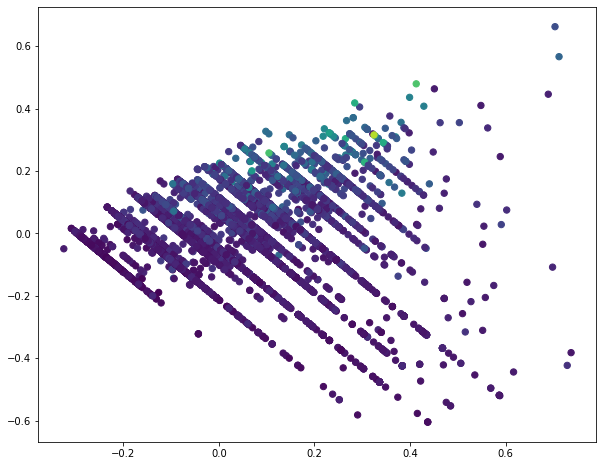

In [90]:

#Aplicar PCA
pca = PCA(n_components = 2)
pca.fit(x_scal0)
Xpca = pca.fit_transform(x_scal0)


#print(xt[:])
print(np.shape(Xpca))
print(np.shape(y1))
plt.figure(figsize = (10,8))
plt.scatter(Xpca[:,0],Xpca[:,1], c = y1, s = 40)
plt.show()


In [95]:
#Partir la data
Xtrain1,Xtest1,ytrain1,ytest1 = tts(Xpca,y_scal0, test_size=0.3, random_state=42)

#Crear modelo RIDGE
modelridge = Ridge(alpha = 0.5)
modelridge.fit(Xtrain1, ytrain1)
y_pred_train_ridge = modelridge.predict(Xtrain1)
y_pred_test_ridge = modelridge.predict(Xtest1)
r2_train_ridge = r2_score(ytrain1, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(ytrain1,y_pred_train_ridge)

r2_test_ridge =r2_score(ytest1, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(ytest1,y_pred_test_ridge)

print('_'*60)
print('PARA ENTRENAMIENTO CON PCA')
print('')
print('El r2 es  : ', r2_train_ridge)
print('El mse es : ', mse_train_ridge)
print('-'*50)
print('PARA VALIDACIÓN CON PCA')
print('')
print('El r2 es  : ', r2_test_ridge)
print('El mse es : ', mse_test_ridge)
print('_'*60)


____________________________________________________________
PARA ENTRENAMIENTO CON PCA

El r2 es  :  0.39035131988383565
El mse es :  0.0030973794827228937
--------------------------------------------------
PARA VALIDACIÓN CON PCA

El r2 es  :  0.3863342574955875
El mse es :  0.0032428724044014927
____________________________________________________________


In [96]:
#Sin pca
#Partir la data
Xtrain2,Xtest2,ytrain2,ytest2 = tts(x1,y1, test_size=0.3, random_state=42)

modelridge2 = Ridge(alpha = 0.5)
modelridge2.fit(Xtrain2, ytrain2)

y_pred_train_ridge2 = modelridge2.predict(Xtrain2)
y_pred_test_ridge2 = modelridge2.predict(Xtest2)

r2_train_ridge2 = r2_score(ytrain2, y_pred_train_ridge2)
mse_train_ridge2 = mean_squared_error(ytrain2,y_pred_train_ridge2)

r2_test_ridge2 =r2_score(ytest2, y_pred_test_ridge2)
mse_test_ridge2 = mean_squared_error(ytest2,y_pred_test_ridge2)

print('_'*60)
print('PARA ENTRENAMIENTO SIN PCA')
print('')
print('El r2 es  : ', r2_train_ridge2)
print('El mse es : ', mse_train_ridge2)
print('-'*50)
print('PARA VALIDACIÓN SIN PCA')
print('')
print('El r2 es  : ', r2_test_ridge2)
print('El mse es : ', mse_test_ridge2)
print('_'*60)

____________________________________________________________
PARA ENTRENAMIENTO SIN PCA

El r2 es  :  0.39168746838403623
El mse es :  245631600276.7655
--------------------------------------------------
PARA VALIDACIÓN SIN PCA

El r2 es  :  0.36987644513159135
El mse es :  264646643822.55807
____________________________________________________________


In [ ]:
#####

PREGUNTA3


In [110]:
!pip uninstall openpyxl

Found existing installation: openpyxl 2.5.9
Uninstalling openpyxl-2.5.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/openpyxl-2.5.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/openpyxl/*
Proceed (y/n)? y
  Successfully uninstalled openpyxl-2.5.9


In [111]:
!pip install openpyxl


     |████████████████████████████████| 242 kB 6.9 MB/s 


In [4]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
df_wine = pd.read_excel('/content/wine.xlsx')
display(df_wine.head())


,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
df_wine['country'].value_counts()

In [ ]:
df_wine['country'].unique()

In [ ]:
df_wine.describe()

In [97]:
df_wine['country'].value_counts()
xdf = df_wine.drop(columns=['id','country','description','designation','province','region_1','region_2','variety','winery'])


In [ ]:
print(xdf[:0])
print(xdf['price'].unique())   #Se aprecia que hay un dato faltante

In [98]:
from numpy.core.numeric import NaN
from sklearn.impute import SimpleImputer
#Dividiendo la data
X_precio = np.array(xdf['price'])
X_precio2 = np.reshape(X_precio, (len(X_precio), 1))

#Agregando mean a los valores faltantes // Not a Number
imp_mean = SimpleImputer(missing_values = NaN, strategy='mean')
X_precio = imp_mean.fit_transform(X_precio2)

In [101]:

#Agregando 'precio' normalizado al nuevo dataframe
df_wine_new = df_wine.drop(columns=['price', 'id'])
df_wine_new['precio'] = np.array(np.round_(X_precio, 2))

In [102]:
df_wine_new.head()

,country,description,designation,points,province,region_1,region_2,variety,winery,precio
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,235.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,110.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,90.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,65.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,66.0


In [103]:
puntos = df_wine_new['points']

#X_features = np.c_[puntos]
X_features = np.array(df_wine_new.drop(columns=['country','description','designation','province','region_1','region_2','variety','winery','precio']))
y_target = np.array(df_wine_new['precio'])
xdf2 = df_wine_new.drop(columns=['country','description','designation','province','region_1','region_2','variety','winery'])

In [104]:
print(np.shape(X_features))

(150930, 1)


In [105]:
X_precio

array([[235.],
       [110.],
       [ 90.],
       ...,
       [ 20.],
       [ 52.],
       [ 15.]])

In [106]:
print(y_target)
y_target = np.reshape(y_target,(len(y_target),1))
print(np.shape(y_target))

[235. 110.  90. ...  20.  52.  15.]
(150930, 1)


In [176]:
X_features  #Points

array([[96],
       [96],
       [96],
       ...,
       [91],
       [90],
       [90]])

In [107]:
#Estandarizar y Escalar la data


scaler2 = StandardScaler().fit(X_features)
x_standarized2 = scaler2.fit_transform(X_features)
scaler3 = StandardScaler().fit(y_target)
y_standarized2 = scaler3.fit_transform(y_target)

scal = MinMaxScaler()  
x_scal = scal.fit_transform(x_standarized2)
y_scal = scal.fit_transform(y_standarized2)

Xtrain3,Xtest3,ytrain3,ytest3 = tts(x_scal,y_scal, test_size=0.3)



In [108]:
#Dividimos la data
modelrandom1 = RFR(n_estimators=200, random_state = 42)
modelrandom1.fit(Xtrain3,ytrain3)
#modelrandom1.fit(x_scal,y_target)

y_predi_test = modelrandom1.predict(Xtest3)
y_predi_train = modelrandom1.predict(Xtrain3)

r2_train_random = r2_score(ytrain3,y_predi_train)
r2_test_random = r2_score(ytest3,y_predi_test)

print('_'*50)
print('PARA ENTRENAMIENTO')
print('')
print('El r2 es: ', round(r2_train_random,2) )

print('-'*40)
print('PARA VALIDACIÓN')
print('')
print('El r2 es: ', round(r2_test_random,2) )
print('_'*50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


__________________________________________________
PARA ENTRENAMIENTO

El r2 es:  0.29
----------------------------------------
PARA VALIDACIÓN

El r2 es:  0.26
__________________________________________________


PREGUNTA 4

In [109]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
cancer_df = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
display(cancer_df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
X_df_cancer = cancer_df.drop(columns = ['id','diagnosis'])
y_array = np.array(cancer_df['diagnosis'])
x_array = np.array(X_df_cancer)

In [111]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
y_array = Encoder.fit_transform(y_array)
y_array = np.reshape(y_array,(len(y_array),1))

print(y_array[:4])
print(np.shape(y_array))

[[1]
 [1]
 [1]
 [1]]
(569, 1)


In [112]:
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
x_array = escalar.fit_transform(x_array)
print(x_array[0:4,:])


[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.38537513 0.35974441 0.83505155 0.

In [113]:
print(np.shape(x_array))

(569, 30)


In [114]:
#Dividir la data
Xtrain4,Xtest4,ytrain4,ytest4 = tts(x_array,y_array, test_size = 0.2)

In [115]:
##Crear el modelo
ModeloClasificador = tf.keras.Sequential([
                     tf.keras.Input(shape = (30,)),
                     tf.keras.layers.Dense(30, activation='relu'),
                     tf.keras.layers.Dense(60, activation='relu'),
                     tf.keras.layers.Dense(30, activation='relu'),
                     tf.keras.layers.Dense(10, activation='relu'),
                     tf.keras.layers.Dense(4, activation='relu'),
                     tf.keras.layers.Dense(2, activation='relu'),
                     tf.keras.layers.Dense(1, activation='sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,
                           optimizer =tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

In [116]:
historico = ModeloClasificador.fit(Xtrain4,ytrain4,epochs = 500,verbose = False)

In [117]:
from sklearn.metrics import recall_score, confusion_matrix

ypredtrain = np.round(ModeloClasificador.predict(Xtrain4),0)
ypredtest = np.round(ModeloClasificador.predict(Xtest4),0)

recall_clasificador_test = recall_score(ytest4,ypredtest)
recall_clasificador_train = recall_score(ytrain4,ypredtrain)

matriz =confusion_matrix(ytest4,ypredtest)

print(recall_clasificador_train)
print(recall_clasificador_test)
print(matriz)

1.0
1.0
[[50 18]
 [ 0 46]]


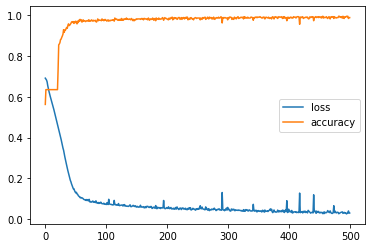

In [118]:
pd.DataFrame(historico.history).plot()

In [ ]:
"""
Crea una función que aplane la ruta de una imágen
"""

import matplotlib.pyplot as plt

def AplanarImagen():

  print('Recuerda subir tu imagen')
  ruta = input('Ingrese la ruta de la imagen: ')
  imagen = plt.imread(ruta)
  plt.imshow(imagen)
  plt.show()
  imagen_vector = imagen.flatten()
  print('El vector de la imagen aplanada es: ')
  print(imagen_vector)


Recuerda subir tu imagen en formato jpg
Ingrese la ruta de la imagen: /content/Gato2.jpg


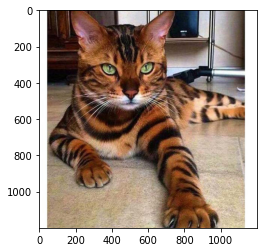

El vector de la imagen aplanada es: 
[255 255 255 ... 255 255 255]


In [133]:
AplanarImagen()